In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from helper_funcs import *

In [2]:
df = pd.read_csv('./ex1data2.txt',delimiter=',', header=None, names=['Sq.feet', 'Bedrooms', 'Price'])


In [3]:
df.describe()

,Sq.feet,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Sq.feet   47 non-null     int64
 1   Bedrooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


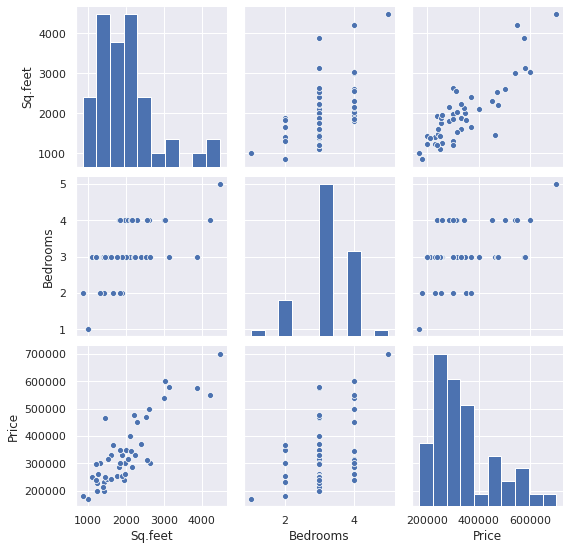

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
df.head(10)

,Sq.feet,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [7]:
def mean_normalization(x): 
    # given x is a 2D numpy array
    # output is the same list that is normalised to the mean/std 
    # we need to store the value of mean, std_dev of each column in a dictionary
    x_data = x[:,:-1]
    y_data = x[:,-1]
    data_array = np.array(x_data)
    mean = np.mean(x_data,axis=0,keepdims=True)
    std = np.std(x_data,axis=0,keepdims=True)
    
    stat_dict = list(zip(mean,std))

    norm_data_array = (x_data - mean)/std
    
    return norm_data_array,y_data,stat_dict[0]

In [8]:
normalised_xdata,_,_ = mean_normalization(np.array(df))

In [9]:
df2 = pd.DataFrame(normalised_xdata,columns=['Sq.feet', 'Bedrooms'])

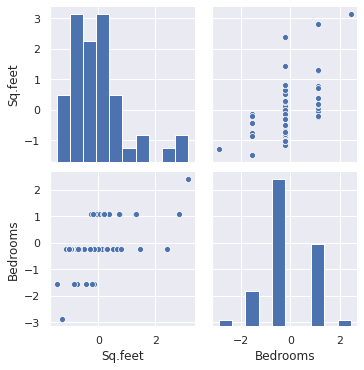

In [10]:
sns.pairplot(df2)

# same distribution as before but easier calculcation !!

# Multivariate Linear Regression

- We assume a relationship of the form : $Y =  X_1 \theta_1+  X_2 \theta_2+ \theta _3 X_3 $ where Y represents the targent column of "Price" and the independent variables $\{X_i\}$ correspond to Sq.feet, Bedrooms and a columns of 1's
- We want to predict parameter set $\bar{\theta} = \{\theta_1,\theta_2,\theta_3 \} $
- Enter ML ! Enter Gradient Descent !


## Cost Function 

We define a cost function, $J(\theta_1,\theta_2,\theta_3)$ associated with each training set example as : 
$$ J = \frac{1}{2m}\sum_{i=1}^m (Y^{pred} - Y)^2$$
$$ J = \frac{1}{2m}\sum_{i=1}^m (X \bar{\theta} - Y)^2$$
$$ J = \frac{1}{2m}\sum_{i=1}^m ( X_1 \theta_1+  X_2 \theta_2+ \theta _3 - Y)^2$$

## Gradient Function

We perform Gradient Descent to optimize and obtain the global minima of the cost function. We first define the partial derivatives of the $J$ with respect to each parameter $\theta _i$:

$$ \frac{\partial J}{\partial \theta _i} = \frac{1}{m} \sum_i^m (\sum_{j=1}^n X_j\theta_j  - Y)*X_i $$

After each iteration of Gradient descent, we update the parameters as : 

$$ \theta _i = \theta _i - \alpha * \frac{\partial J}{\partial \theta _i}$$


In [11]:
normalised_xdata,Y,stat_dict = mean_normalization(np.array(df))

In [12]:
# Add extra column of 1's to X 

X = normalised_xdata
X = np.hstack((X,np.ones((X.shape[0],1))))
Y = Y.reshape(len(Y),1)

In [13]:
def cost_function(X,Y,theta):
    y_pred = X@theta
    cost = (1/2)*np.mean((y_pred - Y).T @ (y_pred - Y))
    return cost

def compute_grad(X,Y,theta):
    m = len(X)
    y_pred = X@theta
    grad_theta = np.zeros((len(theta),1))
    for i in range(len(theta)):
        grad_theta[i] = (1/m)*sum((y_pred-Y)*(X[:, i].reshape(m,1)))
    return grad_theta


def gradient_descent(X,Y,theta,n_iters,learning_rate):
    
    J_list = []
    for i in range(n_iters):
        J = cost_function(X,Y,theta=theta)
        grad_theta = compute_grad(X,Y,theta=theta)
        theta -= learning_rate*grad_theta
        J_list.append(J)
    return theta, J_list

In [14]:
# Initial cost 
theta = np.random.rand(3,1)
print('Initial theta:',theta.T)

c0 = cost_function(X,Y,theta)
print('Initial cost:',c0)

# Initial gradient
g0 = compute_grad(X,Y,theta)
print('Initial gradient:',g0.T)

Initial theta: [[0.20217911 0.48026214 0.62645132]]
Initial cost: 3082790498259.5137
Initial gradient: [[-105763.66238266  -54708.22828006 -340412.03312315]]


In [15]:
# Perform Gradient descent for 1000 iters
f_theta, J_list = gradient_descent(X,Y,theta,n_iters=10000,learning_rate=0.03)

Text(0.5, 0, 'No of iterations')

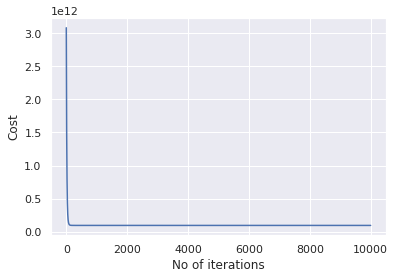

In [17]:
plt.plot(J_list)
plt.ylabel('Cost')
plt.xlabel('No of iterations')

In [18]:
# Learnt parameters ! 

print('Final Theta parameters : ',f_theta.T)
print('Final Cost :', J_list[-1])

Final Theta parameters :  [[109447.79646964  -6578.35485416 340412.65957447]]
Final Cost : 96034162378.33298


In [19]:
# Reduction in cost :

print(f'Cost reduced by {(1 - J_list[-1]/c0)*100 :.4}%')

Cost reduced by 96.88%


In [20]:
Y_pred = X@f_theta

In [21]:
def r_sqr(y,y_pred):
    num = np.sum((y-y_pred)**2)
    den = np.sum((y-np.mean(y))**2)
    r_sq = 1 - (num/den)
    return r_sq

In [22]:
r2 = r_sqr(Y,Y_pred)
print(r2)

# Not very bad for a very simple linear model !!

0.7329450180289141


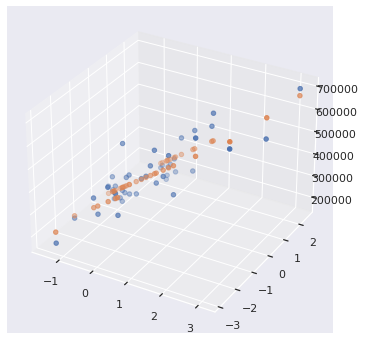

In [23]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection ="3d")

ax.scatter3D(X[:,0],X[:,1],Y,'ro',label='Data')
ax.scatter3D(X[:,0],X[:,1],Y_pred,'k--',label='Prediction')
plt.show()

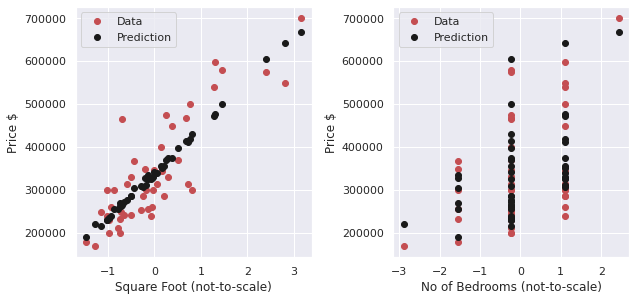

In [24]:
# We can check the Projection n each of the two independent axes

fig = plt.figure(figsize=(9,8))
x_axis = ['Square Foot','No of Bedrooms']
for i in range(2):
    plt.subplot(2,2,1+i)
    plt.plot(X[:,i],Y,'ro',label='Data')
    plt.plot(X[:,i],Y_pred,'ko',label='Prediction')
    plt.xlabel(x_axis[i]+' (not-to-scale)')
    plt.ylabel('Price $')
    plt.legend()

plt.tight_layout()

In [25]:
# Given a new house of 2000sq.feet and a 3BHK, we can have a prediction as follows : 

def house_price(sq_foot,no_bhk,theta):
    price = theta[0]*sq_foot + theta[1]*no_bhk + theta[2]
    return price

In [26]:
house_price(3000,4,f_theta)



array([3.28657489e+08])

- Cost of a 3BHK House with a sq.foot area of 3000 m^2 is ~ 3billion dollars ? 
    - (Need a better model) !
    - Introduce new features and build a more complex nonlinear model